In [1]:
!pwd

/Users/sparkling/devinside/tutorials_training


In [2]:
!cat breast-cancer-wisconsin.data

1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2
1033078,4,2,1,1,2,1,2,1,1,2
1035283,1,1,1,1,1,1,3,1,1,2
1036172,2,1,1,1,2,1,2,1,1,2
1041801,5,3,3,3,2,3,4,4,1,4
1043999,1,1,1,1,2,3,3,1,1,2
1044572,8,7,5,10,7,9,5,5,4,4
1047630,7,4,6,4,6,1,4,3,1,4
1048672,4,1,1,1,2,1,2,1,1,2
1049815,4,1,1,1,2,1,3,1,1,2
1050670,10,7,7,6,4,10,4,1,2,4
1050718,6,1,1,1,2,1,3,1,1,2
1054590,7,3,2,10,5,10,5,4,4,4
1054593,10,5,5,3,6,7,7,10,1,4
1056784,3,1,1,1,2,1,2,1,1,2
1057013,8,4,5,1,2,?,7,3,1,4
1059552,1,1,1,1,2,1,3,1,1,2
1065726,5,2,3,4,2,7,3,6,1,4
1066373,3,2,1,1,1,1,2,1,1,2
1066979,5,1,1,1,2,1,2,1,1,2
1067444,2,1,1,1,2,1,2,1,1,2
1070935,1,1,3,1,2,1,1,1,1,2
1070935,3,1,1,1,1,1,2,1,1,2
1071760,2,1,1,1,2,1,3,1,1,2
1072179,10,7,7,3,8,5,7,4,3,4
1074610,2,1,1,2,2,1,3,1,1,2
1075123,3,1,2,1,2,1,2,1,1,2
1079304

In [3]:
!cat breast-cancer-wisconsin.names

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 199

In [6]:
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data', names=['id', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'class'])
df.head()

,id,2,3,4,5,6,7,8,9,10,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)
df.head()

,2,3,4,5,6,7,8,9,10,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [8]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [9]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [10]:
clf = neighbors.KNeighborsClassifier()

In [11]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9571428571428572


In [15]:
df2 = pd.read_csv('breast-cancer-wisconsin.data', names=['id', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'class'])
df2.replace('?',-99999, inplace=True)
#df.drop(['id'], 1, inplace=True)

X2 = np.array(df2.drop(['class'], 1))
y2 = np.array(df2['class'])

X2_train, X2_test, y2_train, y2_test = cross_validation.train_test_split(X2, y2, test_size=0.2)

clf2 = neighbors.KNeighborsClassifier()
clf2.fit(X2_train, y2_train)
accuracy2 = clf2.score(X2_test, y2_test)
print(accuracy2)

0.6357142857142857


In [18]:
example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1, -1)

In [19]:
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [20]:
set(y_train), set(y_test)

({2, 4}, {2, 4})

In [25]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


In [28]:
from math import sqrt
plot1 = [1, 3] # x,y
plot2 = [2, 5]
euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )
print(euclidean_distance)

2.23606797749979


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

In [30]:
dataset = {'k':[[1,2], [2,3], [3,1]], 'r':[[6,5], [7,7], [8,6]] }
new_features = [5,7]

[[<matplotlib.collections.PathCollection object at 0x1a1b338320>, <matplotlib.collections.PathCollection object at 0x1a1b3385f8>, <matplotlib.collections.PathCollection object at 0x1a1b338ac8>], [<matplotlib.collections.PathCollection object at 0x1a1b338e48>, <matplotlib.collections.PathCollection object at 0x1a1b3a4208>, <matplotlib.collections.PathCollection object at 0x1a1b3a4588>]]


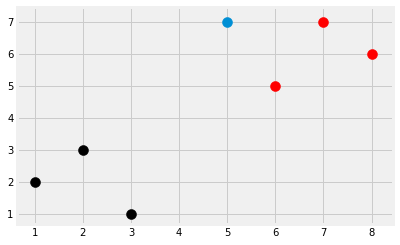

In [33]:
a = [[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
print(a)
plt.scatter(new_features[0], new_features[1], s=100)
plt.show()

In [37]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            # euclidean_distance = sqrt( (features[0]-predict[0])**2 + (features[1]-predict[1])**2 )
            # euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

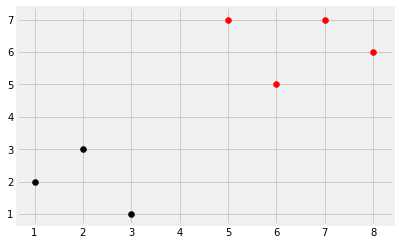

In [38]:
[[plt.scatter(ii[0], ii[1], color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], color=k_nearest_neighbors(dataset, new_features))
plt.show()

In [40]:
full_data = df.astype(float).values.tolist()

In [43]:
print(type(df))
print(type(df.astype(float).values))
print(type(full_data))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'list'>


In [45]:
import random 
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [46]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [47]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy', correct/total)

Accuracy 0.9856115107913669
